# Wage formation in a Nash Bargaining game 

**Table of contents**<a id='toc0_'></a>    
- [Model description](#toc1_) 
- [Analytical solution](#toc2_)    
- [Numerical solution](#toc3_)   
- [Further analysis](#toc4_)   
- [Conclusion](#toc5_) 

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
from types import SimpleNamespace
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

from modelproject import NashBargainingClass
model = NashBargainingClass()


## <a id='toc1_'></a>[Model description](#toc0_)

We consider a simple Nash bargaining problem between two bargainers/players: $N = \{1,2\}$. In our case, the two players are a firm and a worker who bargain about splitting the productivity of the worker in a one shot game. The players either reach an agreement on the distribution of the surplus or fail to reach an agreement in which they receive the threat point $D=(d_1,d_2)$. $d_1$ can be thought for as unemployment benefits which the bargained wage has to exceed for the contract to be entered into. We assume that $d_2=0$. 

The firm's utility function is defined as the profit after paying wage to the worker because we assume that labour is the only production input. $\theta$ is the value of labour in the form of productivity while $w\in [d_1,\theta]$ is the wage of the worker. We assume that both agents are risk neutral. The utility functions are thus presented as:
$$
\begin{aligned}
u_1(w) &= w \\
u_2(\theta, w) &= \theta - w \\
\end{aligned}
$$

The Nash bargaining problem includes asymmetry as we assume that the firm and the worker have different bargaining power. Thus the worker and the firm shares the contract surplus dependent on their relative bargaining power reflected by $\alpha \in [0,1]$ conditional on the threat point. $\alpha$ is the bargaining power of the worker while the bargaining power of the firm is $1-\alpha$. 

If the axioms "Invariance to Equivalent Utility Representations", "Independence of Irrelevant Alternatives" and "Pareto Efficiency" are fulfilled the unique solution of the Nash baragining problem with asymmetry where $D=(d_1,0)$ is given by
$$
\begin{aligned}
f(u,d) &= \arg \max_{w} (u_1(w)-d_1)^\alpha (u_2(\theta,w)-d_2)^{1-\alpha}  \\
&= \arg \max_w (w-d_1)^\alpha(\theta-w)^{1-\alpha}\\
\end{aligned}
$$

The Nash solution maximizes the product of surplus utilities of the firm and the worker. 

## <a id='toc2_'></a>[Analytical solution](#toc0_)

We find the analytical solution of the model by characterizing the solution as a function of the parameters of the model:

In [2]:
analyticalsolution = sm.Eq(model.par.w,model.analyticalsolution())
analyticalsolution

Eq(w, alpha*theta + d1*(1 - alpha))

The wage is the weighted average of the productivity, $\theta$, and the workers' threat point where the weights are the bargaining power of the firm and the worker, respectively. 

## <a id='toc3_'></a>[Numerical solution](#toc0_)

Now we solve the model numerically. 
For the numerical solution we assume that $\theta=60$, $d_1 = 10$, $d_2 = 0$ and $\alpha = 1/3$.

In [3]:
numericalsolution = model.numericalsolution()
print(f'w = {numericalsolution:.1f}')

w = 26.7


The value w = 26.7 represents the wage calculated by the Nash bargaining model based on the parameters and assumptions stated above. This wage is the bargaining solution where both the worker's and the employer's utility surplus are maximized given their bargaining conditions.

We look at how the wage changes when $\alpha$ changes:

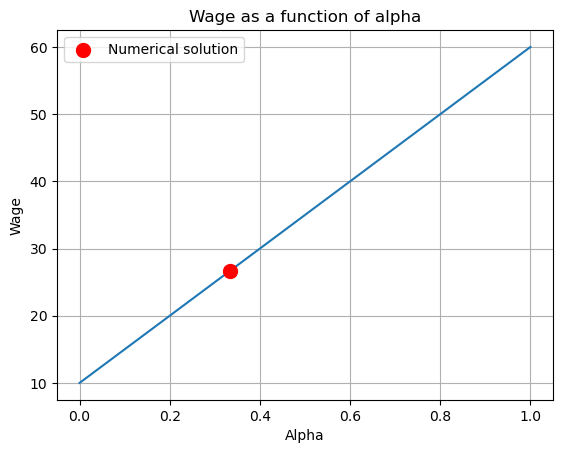

In [4]:
model.varyingalpha()

As $\alpha$ changes the wage varies within the bounds of $\theta$ and $d_1$. When $\alpha=0$ the firm receives all the surplus of the contract as the wage becomes equal to the worker's minimum required wage, $w^{min}=d_1=10$. The wage is an increasing function of the worker's bargaining power, $\alpha$. In the limiting case where $\alpha=1$ the wage equals the maximum wage the firm can offer such that the profit is not negative which is equal to the value of labour, $w^{max}=\theta=60$. 

In the our numerical solution where $\alpha=1/3$ the wage is relatively low, $w=26.7$, because of the low bargaining power of the worker expressed by $\alpha$ and the relatively low threat point, $d_1=10$.

## <a id='toc_4'></a>[Further analysis](#toc0_)

We simulate a wage distribution of 10.000 individuals whose wages are determined by the Nash bargaining model. It is again assumed that $d_1=10$, $d_2=0$ and $\alpha = 1/3$. However, now productivity values of the individuals are drawn from a normal distribution with mean 60 and standard deviation of 10:

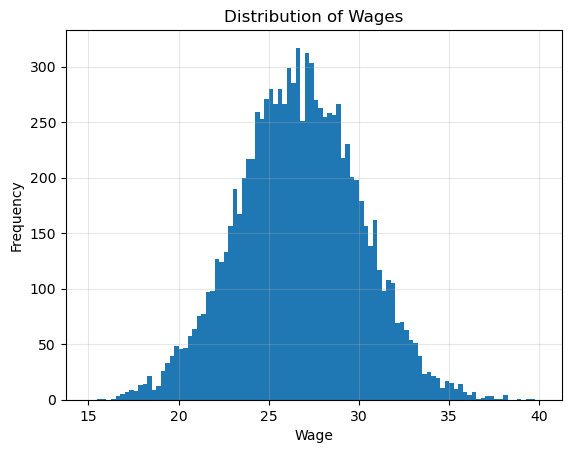

In [5]:
model.simulatewdistribution()

This histogram depicts the distribution of wages resulting from the Nash Bargaining model. The spread of the distribution indicates variability in wage outcomes which result from differences in productivity, $\theta$.

Below an interactive plot lets you adjust $\alpha$ and $d_1$ to see how they affect the wage distribution within the Nash bargaining framework. Note that when updating the results it takes a bit of time for the figure to appear:

FloatSlider(value=0.1, description='Alpha: Bargaining power of the worker', layout=Layout(margin='0px 0px 0px …

IntSlider(value=10, description='d1: Threat Point', layout=Layout(margin='0px 0px 0px 20px', width='600px'), m…

Button(description='Update Results', style=ButtonStyle())

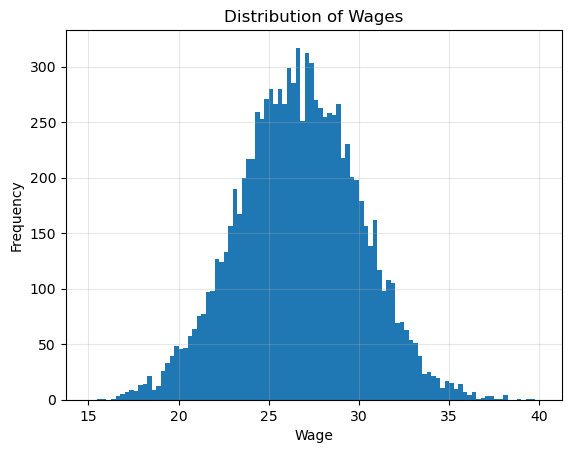

In [ ]:
model.interactive_plot()

A larger value of $\alpha$ and/or $d_1$ push the distribution of wages to the right because the worker gains bargaining power. 

Now we introduce a minimum wage, $m=20$ and return to assuming that $\alpha=1/3$ and $d_1=10$. It is assumed that this does not affect the threat point which is exogenous. The minimum wage is introduced as a constraint in the maximization problem above such that $w\in [m, \theta]$.

For contracts where the productivity exceeds the minimum wage the wage distribution becomes:

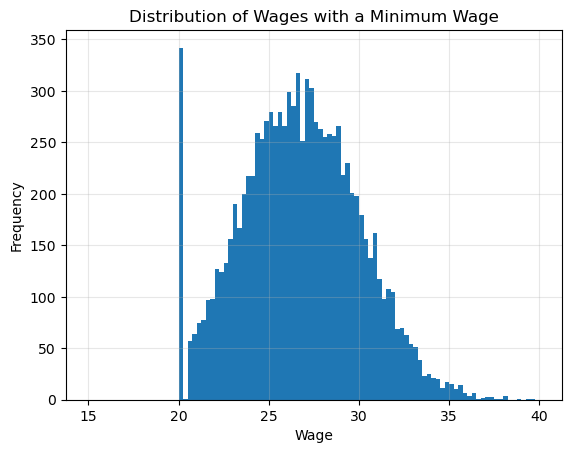

In [7]:
model.minimumwage()

For contracts where $\theta < m$ it is no longer profitable for the firm to hire the worker so here no wage will be agreed on. In cases where the minimum wage is not binding (where the wage without the minimum wage already exceeds the minimum wage) the axiom of Independence of Irrelevant Alternatives means that the Nash bargaining solution is unchanged. For workers where $\theta ≥ m$ and the minimum wage is binding the wage is raised (compared to the case without a minimum wage) to equal $m$. So we see that the minimum wage causes bunching in the distribution of wages as illustrated above and no wages below the minimum bound. 

## <a id='toc_5'></a>[Conclusion](#toc0_)

With a Nash Bargaining one shot model it is possible to simulate the situation of wage formation between a firm and a worker. In this model the wage is determined by the solution to the maximization of the product of surplus utilities. The wage is an increasing function of the worker's threat point, $d_1$, the value of labour, $\theta$, and the worker's bargaining power, $\alpha$. Introducing a minimum wage into the model causes less contracts to be entered into but some wages where the productivity exceeds the minimum wage are raised to equal the minimum wage creating bunching in the wage distribution. 